In [1]:
# import Library
import pandas as pd
import nltk

In [2]:
# Reading Dataset  (dataset :> https://www.kaggle.com/taejun/data-analysis-sentimental-analysis)
data = pd.read_csv('dataset/amazon.tsv',sep='\t')

In [3]:
# data = data[['rating','date','verified_reviews']]
data.sample(10)

,rating,date,variation,verified_reviews,feedback
78,5,30-Jul-18,Charcoal Fabric,I LIKE IT ALL,1
2189,5,30-Jul-18,Configuration: Fire TV Stick,I purchased the Fire Stick to be able to watch...,1
1965,5,25-Jul-18,Black Plus,I love my echo plus!!!,1
2765,5,30-Jul-18,Black Dot,I enjoy it. Still discovering new uses.,1
419,5,12-Jul-18,Black,This is my third Dot. They all work perfectly ...,1
2526,5,30-Jul-18,Black Dot,Love my echo dot easy to use and set up,1
2525,1,30-Jul-18,Black Dot,,0
2524,5,30-Jul-18,Black Dot,Kids love it! I love it!,1
742,5,30-Jul-18,Charcoal Fabric,Love my Echo. Still learning how every thing w...,1
1441,4,30-Jul-18,White Show,Very excited to see what it can do,1


In [4]:
data['date'] = pd.to_datetime(data['date'])

# data['day'] = pd.DatetimeIndex(data['date']).day
# data['month'] = pd.DatetimeIndex(data['date']).month

# Concate date and rating
data['clean_date'] = pd.DatetimeIndex(data['date']).day.astype(str) +" "+ pd.DatetimeIndex(data['date']).month.astype(str)
data['date_rating'] = data['rating'].astype(str)+' '+ data['clean_date'] 

# Concatinate variation and verified_reviews in review
# data['review'] =  data['variation'] +' '+ data['verified_reviews'] +' '+ data['date_rating']
data['reviews'] =  data['variation'] +' '+ data['verified_reviews']

data.sample(10)

,rating,date,variation,verified_reviews,feedback,clean_date,date_rating,reviews
1531,5,2018-07-30,Black Show,Good sound! The capacity of join different app...,1,30 7,5 30 7,Black Show Good sound! The capacity of join d...
1466,5,2018-07-30,Black Show,Easy to set up and sooooooo many things it can...,1,30 7,5 30 7,Black Show Easy to set up and sooooooo many t...
2800,5,2018-07-31,Black Dot,The echo dot was easy to set up and use. It he...,1,31 7,5 31 7,Black Dot The echo dot was easy to set up and...
667,5,2018-05-23,Black,It looked brand nrw!! I have nothing to.compla...,1,23 5,5 23 5,Black It looked brand nrw!! I have nothing to....
1672,5,2018-07-28,Black Show,I like the variety of stuff that the echo show...,1,28 7,5 28 7,Black Show I like the variety of stuff that t...
447,5,2018-07-05,Black,Works perfect no wear and tear on the device I...,1,5 7,5 5 7,Black Works perfect no wear and tear on the de...
1065,5,2018-07-30,White Spot,We absolutely love this product!!! Wish we wou...,1,30 7,5 30 7,White Spot We absolutely love this product!!!...
3027,5,2018-07-30,Black Dot,"Works great.Having fun playing music,checking ...",1,30 7,5 30 7,Black Dot Works great.Having fun playing musi...
1861,5,2018-07-28,White Plus,Easy to set up and works like it's supposed to.,1,28 7,5 28 7,White Plus Easy to set up and works like it's...
10,5,2018-07-30,Charcoal Fabric,"I sent it to my 85 year old Dad, and he talks ...",1,30 7,5 30 7,Charcoal Fabric I sent it to my 85 year old D...


In [5]:
y = data['feedback'] #Target Variable
y.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

In [6]:
# Showing file information

# Column Name      ->       Discription
# ------------------------------------------------------------------------
# Rating           ->       satisfaction value of range [1,5]
# date             ->       date of item purchased
# variation        ->       When we shop online, the same product is available in various sizes, colors,materials
#                           and price points. These purchasing options are product variants.
# verified_reviews ->       Feedback by customers 
# feedback         ->       value of verified_reviews positive(1) or negative(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
 5   clean_date        3150 non-null   object        
 6   date_rating       3150 non-null   object        
 7   reviews           3150 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 197.0+ KB


In [7]:
# ========== Performing Cleaning operations on Data ==============

# importing Libraries

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
lemmatizer = WordNetLemmatizer()
punct = string.punctuation
stopwords = set(stopwords.words('english'))


def text_clean(text):
    text = text.lower()  #Convert text in lower case
    punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
    punc_removed_join = ''.join(punc_removed)
    
    #Lemmatizing and removing Stop words
    punc_removed_clean = [lemmatizer.lemmatize(word) for word in punc_removed_join.split() if word not in stopwords]
    
    #Removing word those length is 1 or 2
    punc_removed_clean = [word for word in punc_removed_clean if len(word) > 2] 
    punc_removed_clean_join = ' '.join(punc_removed_clean)
    
    return punc_removed_clean_join

In [8]:

data['clean_reviews'] = data['reviews'].apply(text_clean)  #Calling data clean function
data.sample(10)


,rating,date,variation,verified_reviews,feedback,clean_date,date_rating,reviews,clean_reviews
947,5,2018-07-29,Charcoal Fabric,Enjoyed entire echo experience,1,29 7,5 29 7,Charcoal Fabric Enjoyed entire echo experience,charcoal fabric enjoyed entire echo experience
1674,4,2018-07-28,Black Show,I wish it did more with internet searches. I ...,1,28 7,4 28 7,Black Show I wish it did more with internet s...,black show wish internet search like feature
2179,5,2018-07-30,Configuration: Fire TV Stick,ok,1,30 7,5 30 7,Configuration: Fire TV Stick ok,configuration fire stick
1255,5,2018-07-26,Black Spot,"Great product, what they don't tell you is tha...",1,26 7,5 26 7,"Black Spot Great product, what they don't tel...",black spot great product dont tell allow 34dro...
2896,5,2018-07-30,Black Dot,Up dated news,1,30 7,5 30 7,Black Dot Up dated news,black dot dated news
363,5,2018-07-28,Black,This is our 5th Amazon Echo device. We have p...,1,28 7,5 28 7,Black This is our 5th Amazon Echo device. We ...,black 5th amazon echo device purchased refurbi...
1764,2,2018-07-30,Black Plus,,0,30 7,2 30 7,Black Plus,black plus
1253,2,2018-07-26,White Spot,Honestly it's no different from the Echo dots ...,0,26 7,2 26 7,White Spot Honestly it's no different from th...,white spot honestly different echo dot already...
1215,4,2018-07-27,Black Spot,Yes it met my expectations. The snooze on the...,1,27 7,4 27 7,Black Spot Yes it met my expectations. The s...,black spot yes met expectation snooze alarm ne...
2023,1,2018-07-19,Black Plus,"Unit came with the wrong plug, will have to se...",0,19 7,1 19 7,"Black Plus Unit came with the wrong plug, wil...",black plus unit came wrong plug send back amazon


In [9]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(data)
# profile.to_file(output_file="amazone.html")

In [10]:
data.describe(include="all")

,rating,date,variation,verified_reviews,feedback,clean_date,date_rating,reviews,clean_reviews
count,3150.000000,3150,3150,3150,3150.000000,3150,3150,3150,3150
unique,NaN,77,16,2301,NaN,77,216,2378,2298
top,NaN,2018-07-30 00:00:00,Black Dot,,NaN,30 7,5 30 7,Black Dot,black dot
freq,NaN,1603,516,79,NaN,1603,1176,22,22
first,NaN,2018-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.463175,NaN,NaN,NaN,0.918413,NaN,NaN,NaN,NaN
std,1.068506,NaN,NaN,NaN,0.273778,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [11]:
data.isnull().sum() #Getting null value

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
clean_date          0
date_rating         0
reviews             0
clean_reviews       0
dtype: int64

In [12]:
# # # ----------- Representing data ---------------------

# import seaborn as sns
# sns.pairplot(data,hue='feedback')

In [13]:
# Representing highest perchase on date
date = data['date'].value_counts()
date.head()

2018-07-30    1603
2018-07-29     482
2018-07-28     250
2018-07-26      85
2018-07-31      81
Name: date, dtype: int64

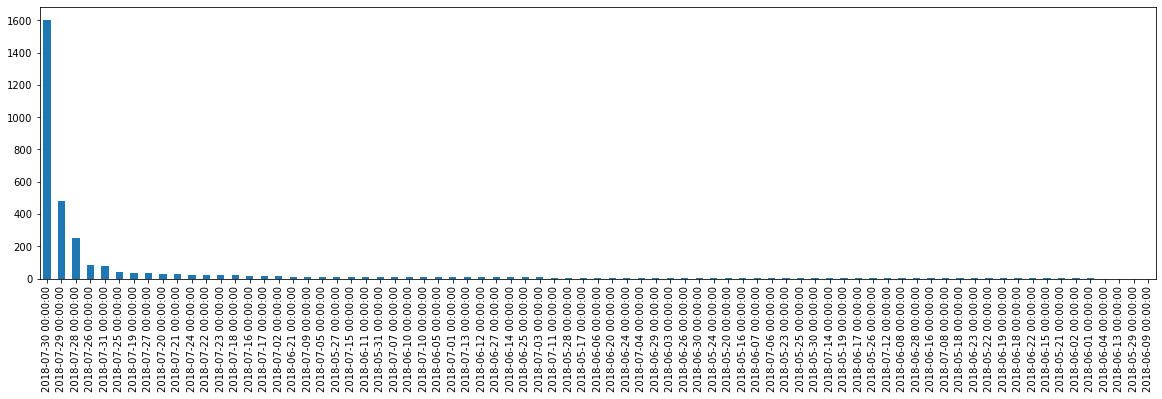

In [14]:
date.plot(kind='bar',figsize=(20,5))

In [15]:
# Representing high rating
rating = data['rating'].value_counts()
rating.head()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

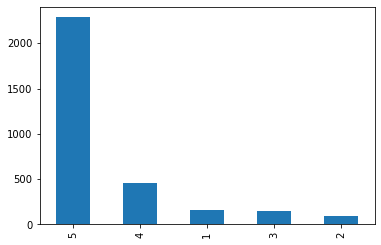

In [16]:
rating.plot(kind='bar')

In [17]:
date_rating = data['date_rating'].value_counts()
date_rating.head()

5 30 7    1176
5 29 7     368
4 30 7     251
5 28 7     187
3 30 7      73
Name: date_rating, dtype: int64

(216,)


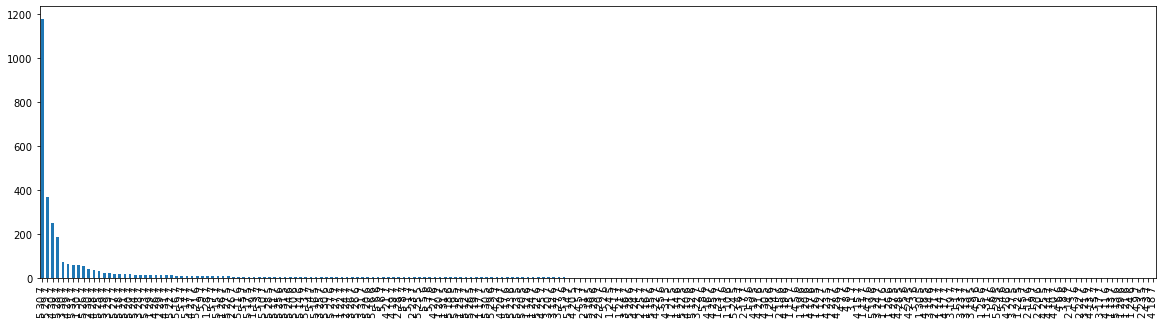

In [18]:
print(date_rating.shape)
date_rating.plot(kind='bar',figsize=(20,5))

In [19]:
# Getting bag of words on in reviews
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=250)
# X = vectorizer.fit_transform(data['clean_reviews'],data['date_rating'],).toarray() #getting array of Bag of Words
X = vectorizer.fit_transform(data['clean_reviews'],data['date_rating']).toarray() #getting array of Bag of Words

X.shape

(3150, 250)

In [20]:
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
# y=pd.get_dummies(data['feedback']) #get_dummies --> it used for categorical variable into a series of zeros and ones
# y=y.iloc[:,1].values #getting value of second column
y = data['feedback']

In [22]:
# y = data['feedback']

In [23]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split      #deviding data into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

# X_train -> Taking dataset for training 
# X_test  -> Taking dataset for testing
# y_train -> output(target data) for training
# y_test  -> output(target data) for testing
# test_size -> The ideal split is said to be 80:20 for training and testing.
#              for our need we adjust it depending on the size of the dataset and parameter complexity.

# random_state -> random state value present the state of suffle data in train and test split

In [25]:
print(X_train)
X_train.shape

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1575, 250)

In [26]:
print(X_test)
X_test.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1575, 250)

In [27]:
print(y_train)
y_train.shape

219     1
2219    1
2550    1
107     1
16      1
       ..
129     1
2657    1
2947    1
2119    1
1805    1
Name: feedback, Length: 1575, dtype: int64


(1575,)

In [28]:
print(y_test)
y_test.shape

2720    1
1763    1
8       1
383     1
27      1
       ..
1126    1
926     1
2230    1
57      1
516     1
Name: feedback, Length: 1575, dtype: int64


(1575,)

# # --------- Model Selection -----------

In [29]:
# Importing library
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

---------------- Using model Logistic regression ------------------

In [30]:
#Using model Logistic regression
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)    #fitting training data in model
pred_logistic = logistic.predict(X_test)  #getting predict value on test data

score = logistic.score(X_test, y_test) #getting accuracy on predict and real data
cm = confusion_matrix(y_test, pred_logistic)  #generating confussion metrics
cr1 = classification_report(y_test, pred_logistic)  #generating classification report

print("Logistic Regression Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr1)

Logistic Regression Accuracy :   0.93
Confussion Metrics :  
 [[  30  105]
 [  13 1427]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.70      0.22      0.34       135
           1       0.93      0.99      0.96      1440

    accuracy                           0.93      1575
   macro avg       0.81      0.61      0.65      1575
weighted avg       0.91      0.93      0.91      1575



---------------- MultinomialNB Classifier ----------------


In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()  
classifier.fit(X_train, y_train)  #fitting training data in model

pred_m = classifier.predict(X_test)  #getting predict value on test data
score = metrics.accuracy_score(y_test, pred_m)  #getting accuracy on predict and real data
cm = metrics.confusion_matrix(y_test, pred_m)   #generating confussion metrics
cr2 = classification_report(y_test, pred_m)  #generating classification report

print("MultinomialNB Classifier Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr2)

MultinomialNB Classifier Accuracy :   0.92
Confussion Metrics :  
 [[  37   98]
 [  34 1406]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.52      0.27      0.36       135
           1       0.93      0.98      0.96      1440

    accuracy                           0.92      1575
   macro avg       0.73      0.63      0.66      1575
weighted avg       0.90      0.92      0.90      1575



------------- KNeighbors Classifier ---------------

In [32]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)  #fitting training data in model

pred_knn = knn.predict(X_test)  #getting predict value on test data
score = metrics.accuracy_score(y_test, pred_knn) #getting accuracy on predict and real data
cm = metrics.confusion_matrix(y_test, pred_knn)
cr3 = classification_report(y_test, pred_knn)

print("KNN Classifier Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr3)

KNN Classifier Accuracy :   0.91
Confussion Metrics :  
 [[   9  126]
 [  19 1421]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.32      0.07      0.11       135
           1       0.92      0.99      0.95      1440

    accuracy                           0.91      1575
   macro avg       0.62      0.53      0.53      1575
weighted avg       0.87      0.91      0.88      1575

